In [1]:
# import standard numerical modules
import numpy as np
import math
import tensorflow as tf

import DCTR


2024-04-12 13:29:05.259381: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-04-12 13:29:05.259489: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
data_dir = './Data/'


In [3]:
# Load pre-normed Datasets: MiNNLO: X1 | POWHEG hvq: X0
# only contain tt-pair; every event has order: 
# tt-pair, top, anti-top
# every particle has arguments: 
# [pt, y, phi, mass, eta, E, PID, w, theta]
# [0 , 1, 2  , 3   , 4  , 5, 6  , 7, 8    ]

# POWHEG hvq
# plotting data; different from training data
X0_plt = []
X0_plt = DCTR.load_dataset(f'{data_dir}/POWHEG_hvq/13TeV/03-04_converted_lhe.npz', i=3) # 9553938 num of MiNNLO samples
print('POWHEG hvq all particles X0_plt.shape: '+str(X0_plt.shape))

X0_test = []
X0_test = DCTR.load_dataset(f'{data_dir}/POWHEG_hvq/13TeV/03-04_normed_converted_lhe.npz', i=3)
print('POWHEG hvq all particles X0_test.shape: '+str(X0_test.shape))



POWHEG hvq all particles X0_plt.shape: (63992361, 3, 9)
POWHEG hvq all particles X0_test.shape: (63992361, 3, 9)


In [4]:
# MiNNLO
# plotting data
X1_plt = []
X1_plt = DCTR.load_dataset(f'{data_dir}/MiNNLO/converted_with_13TeV_NLO/converted_lhe.npz', i=3)
print('MiNNLO all particles X1_plt.shape: '+str(X1_plt.shape))


MiNNLO all particles X1_plt.shape: (9553938, 3, 9)


In [6]:
# get normalized event generator weights

X0_plt_wgt = X0_plt[:, 0, 7].copy() # these are the original event generator weights: +/- 692.257 for hvq
X0_plt_wgt[X0_plt_wgt > 0] = 1 #  masks positive weights and sets them =  1
X0_plt_wgt[X0_plt_wgt < 0] = -1 # masks negative weights and sets them = -1


In [25]:
X1_plt_wgt = X1_plt[:, 0, 7].copy() # these are the original event generator weights: +/- 103.245 for MiNNLO
X1_plt_wgt[X1_plt_wgt > 0] = 1 #  masks positive weights and sets them =  1
X1_plt_wgt[X1_plt_wgt < 0] = -1 # masks negative weights and sets them = -1


In [7]:
# delete energy
X0_test = np.delete(X0_test, 5, -1)

# delete eta
X0_test = np.delete(X0_test, 4, -1)


In [8]:
model = './best_model.tf'

''' # save weights to .h5 file
dctr = tf.keras.models.load_model(model)
dctr.save('best_model_weights.h5')
'''

# calculate rwgt
with tf.device('CPU'):
    rwgt = DCTR.get_rwgt([model], X0_test) # .tf models also include network architecture. get_rwgt() sets up the network for the (list of) models, then calls predict_weights() like in DCTR_notebook_OLD_14-to-13TeV notebook


2024-04-12 13:54:15.798910: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-04-12 13:54:15.800342: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2024-04-12 13:54:15.801804: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (finn-ThinkPad-T540p): /proc/driver/nvidia/version does not exist
2024-04-12 13:54:15.861348: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-12 13:54:34.915561: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 3839541

In [28]:
# setup args for plotting all ~60M events
args = [(X1_plt, X1_plt_wgt, 'NNLO (MiNNLO)'),
        (X0_plt, X0_plt_wgt, 'NLO (hvq)'),
        (X0_plt, rwgt[0], 'dctr reweighted')]


'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


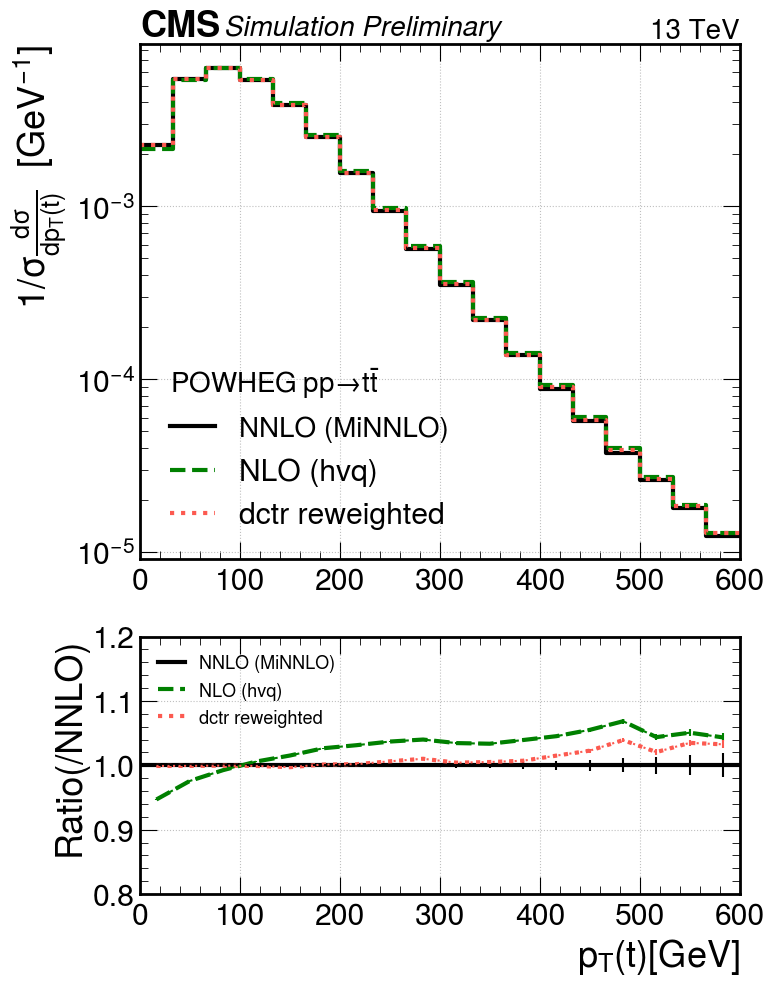

In [30]:
# top p_T with ~60M hvq events

bins = np.linspace(0, 600,19)

DCTR.plot_ratio_cms(args, arg_index=0, part_index=1, bins=bins, y_scale='log', ratio_ylim=[0.8, 1.2], pythia_text=r'$POWHEG \; pp \to  t\bar{t}$')



'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


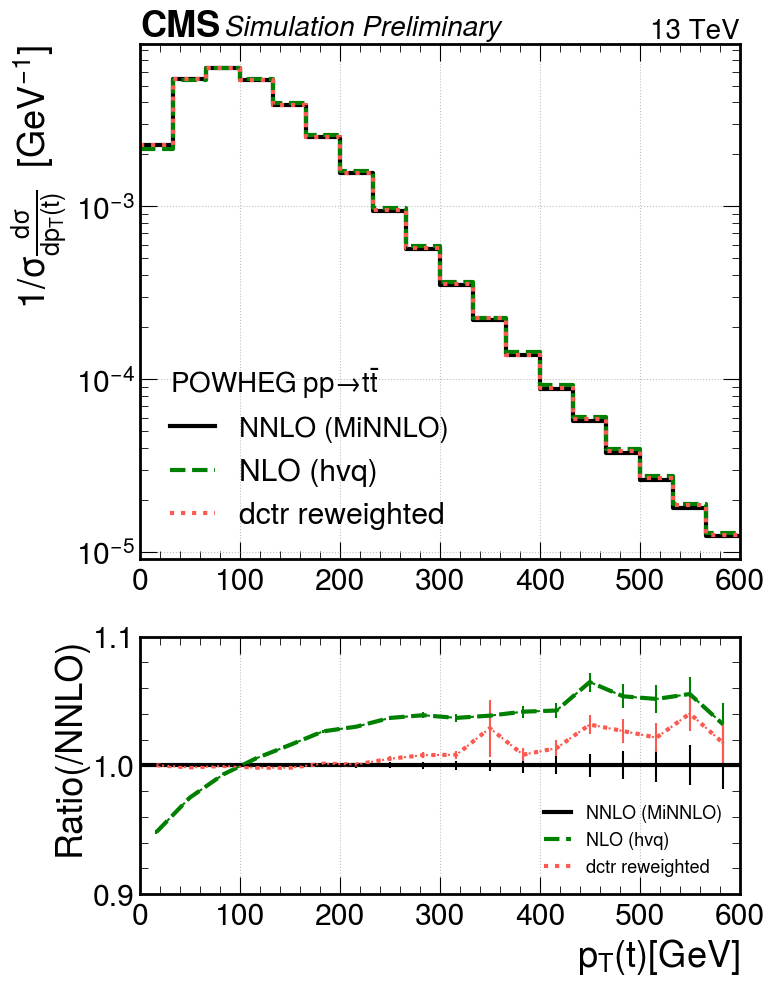

In [34]:
# setup args for plotting with ~10M events
args_10M = [(X1_plt, X1_plt_wgt, 'NNLO (MiNNLO)'),
            (X0_plt[:9553938], X0_plt_wgt[:9553938], 'NLO (hvq)'),
            (X0_plt[:9553938], rwgt[0][:9553938], 'dctr reweighted')]

bins = np.linspace(0, 600,19)

# top p_T with ~10M events
DCTR.plot_ratio_cms(args_10M, arg_index=0, part_index=1, bins=bins, y_scale='log', ratio_ylim=[0.9, 1.1], pythia_text=r'$POWHEG \; pp \to  t\bar{t}$')



'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


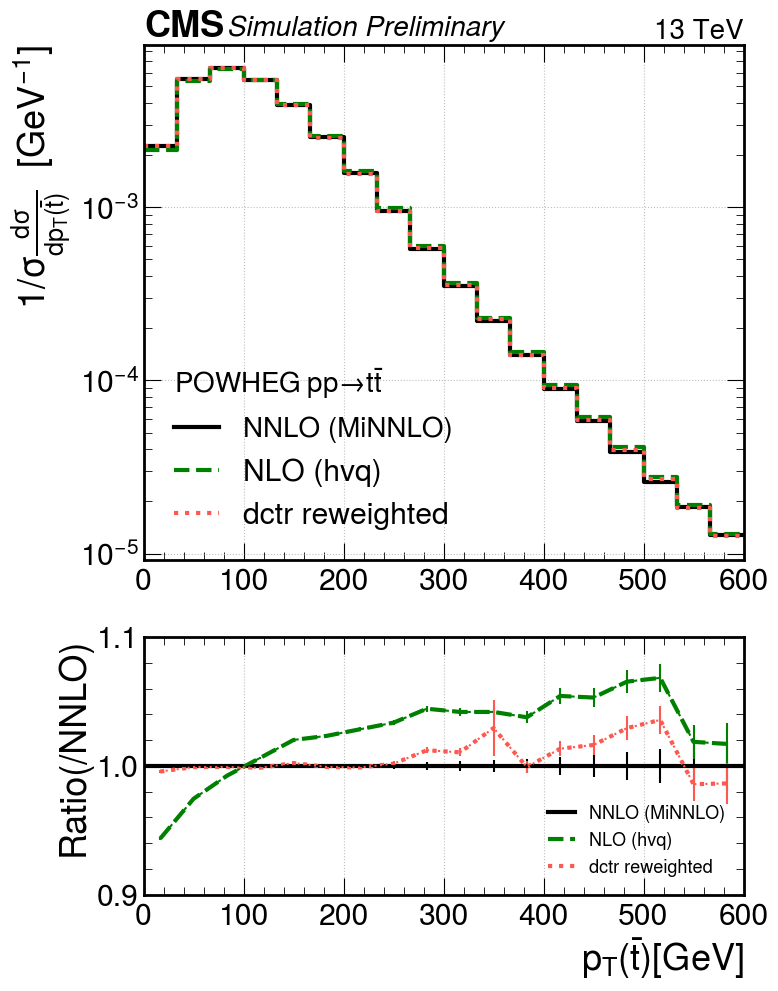

In [35]:
# anti-top p_T
DCTR.plot_ratio_cms(args_10M, arg_index=0, part_index=2, bins=bins, y_scale='log', ratio_ylim=[0.9, 1.1], pythia_text=r'$POWHEG \; pp \to  t\bar{t}$')


# bin reweighting

# NEW bin rwgt using m(tt) and p_T(t)

In [31]:
from hep_ml.reweight import BinsReweighter

bin_reweighter = BinsReweighter(n_bins=31, n_neighs=2) 

X0_bin_rwgt_org = []
X1_bin_rwgt_target = []

# decide which (2) dimensions to do the bin rwgt along
X0_bin_rwgt_org.append(X0_plt[:,0,3]) # m(tt)
X0_bin_rwgt_org.append(X0_plt[:,1,0]) # p_T(t)
X0_bin_rwgt_org = np.transpose(X0_bin_rwgt_org) # wants to be [num_samples, num_dim]

X1_bin_rwgt_target.append(X1_plt[:,0,3]) # p_m(tt)
X1_bin_rwgt_target.append(X1_plt[:,1,0]) # p_T(t)
X1_bin_rwgt_target = np.transpose(X1_bin_rwgt_target)

# print(f'X0_bin_rwgt_org: {np.array(X0_bin_rwgt_org)}')
# print(f'X1_bin_rwgt_target: {np.array(X1_bin_rwgt_target)}')

print(f'X0_bin_rwgt_org.shape: {np.shape(X0_bin_rwgt_org)}')
print(f'X0_plt_wgt length: {len(X0_plt_wgt)}')
print(f'X1_bin_rwgt_target.shape: {np.shape(X1_bin_rwgt_target)}')
print(f'X1_plt_wgt length: {len(X1_plt_wgt)}')

bin_reweighter.fit(original=X0_bin_rwgt_org, target=X1_bin_rwgt_target,
               original_weight=X0_plt_wgt, target_weight=X1_plt_wgt)


bin_rwgt = bin_reweighter.predict_weights(X0_bin_rwgt_org, original_weight=X0_plt_wgt)



X0_bin_rwgt_org.shape: (63992361, 2)
X0_plt_wgt length: 63992361
X1_bin_rwgt_target.shape: (9553938, 2)
X1_plt_wgt length: 9553938


'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


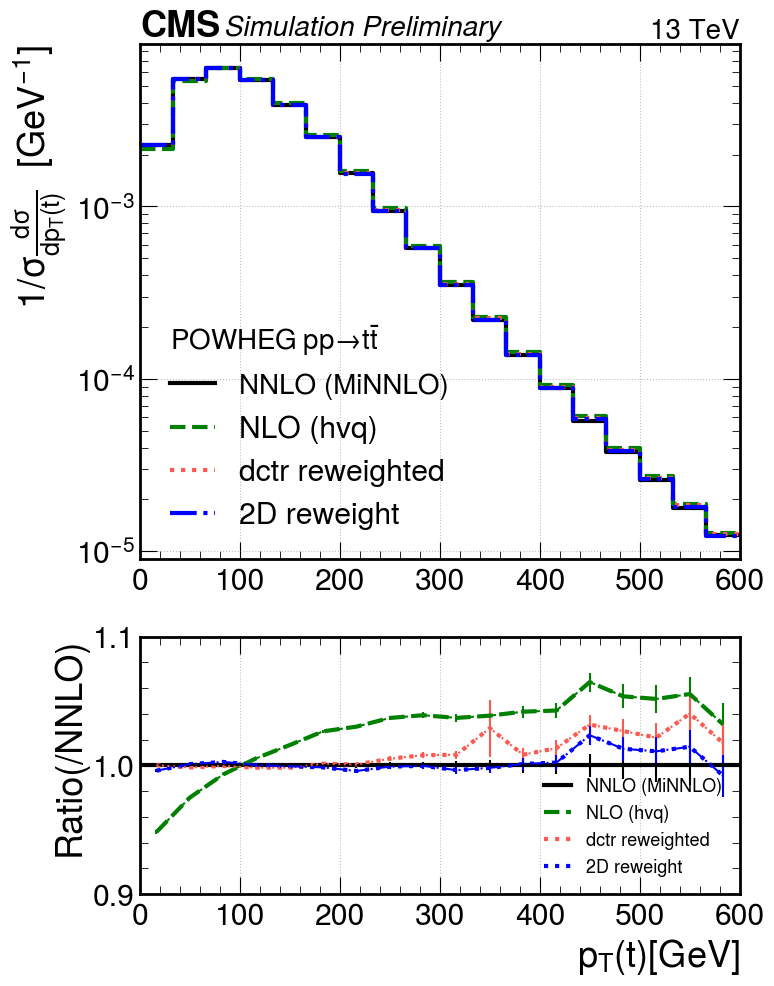

NNLO (MiNNLO): mean: 120.981, std: 80.007, max/min: 2125.1621873385748/0.02517621005772228 
 Mean Absolute Error 0.0 
 Mean Relative Error 0.0 
 reduced chi square of 0.0 with p 1.0 
 compared to NNLO (MiNNLO)
NLO (hvq): mean: 122.756, std: 80.688, max/min: 2118.3017198949424/0.029502534939254157 
 Mean Absolute Error 8583.585845627686 
 Mean Relative Error 0.035907029855353684 
 reduced chi square of 109.96750375467167 with p 0.0 
 compared to NNLO (MiNNLO)
dctr reweighted: mean: 121.255, std: 80.564, max/min: 2118.3017198949424/0.029502534939254157 
 Mean Absolute Error 897.6236165364584 
 Mean Relative Error 0.01417548954486847 
 reduced chi square of 3.8033750302491183 with p 1.755481047860278e-07 
 compared to NNLO (MiNNLO)
2D reweight: mean: 120.968, std: 80.070, max/min: 2118.3017198949424/0.029502534939254157 
 Mean Absolute Error 744.7251564092535 
 Mean Relative Error 0.005065443368577972 
 reduced chi square of 2.1949805866665932 with p 0.003049819275229094 
 compared to NNL

'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


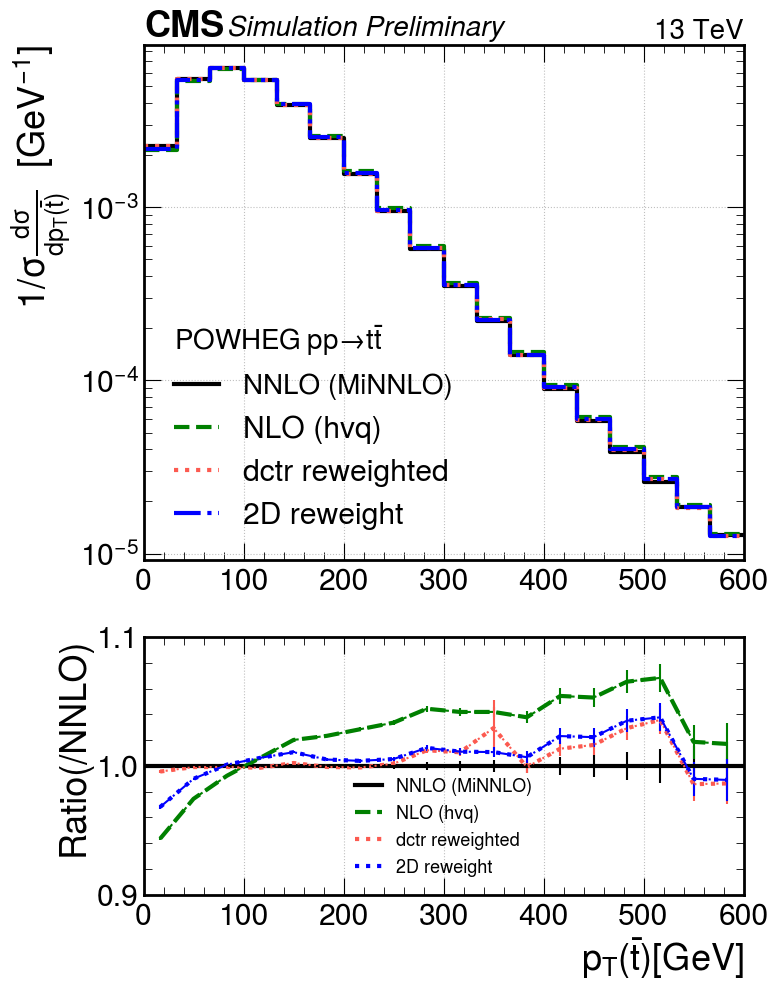

NNLO (MiNNLO): mean: 121.297, std: 80.304, max/min: 2088.7083067517383/0.0166167204004877 
 Mean Absolute Error 0.0 
 Mean Relative Error 0.0 
 reduced chi square of 0.0 with p 1.0 
 compared to NNLO (MiNNLO)
NLO (hvq): mean: 123.134, std: 80.983, max/min: 2125.476380886313/0.013901093618147972 
 Mean Absolute Error 9019.126167185908 
 Mean Relative Error 0.036234049894120504 
 reduced chi square of 120.745263723818 with p 0.0 
 compared to NNLO (MiNNLO)
dctr reweighted: mean: 121.554, std: 80.722, max/min: 2125.476380886313/0.013901093618147972 
 Mean Absolute Error 957.8789876302084 
 Mean Relative Error 0.012124473229050636 
 reduced chi square of 3.3390849457847374 with p 3.556835907683771e-06 
 compared to NNLO (MiNNLO)
2D reweight: mean: 121.942, std: 80.457, max/min: 2125.476380886313/0.013901093618147972 
 Mean Absolute Error 3619.503104914638 
 Mean Relative Error 0.014476594096594297 
 reduced chi square of 46.369509112183 with p 1.429970856491554e-156 
 compared to NNLO (MiN

'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


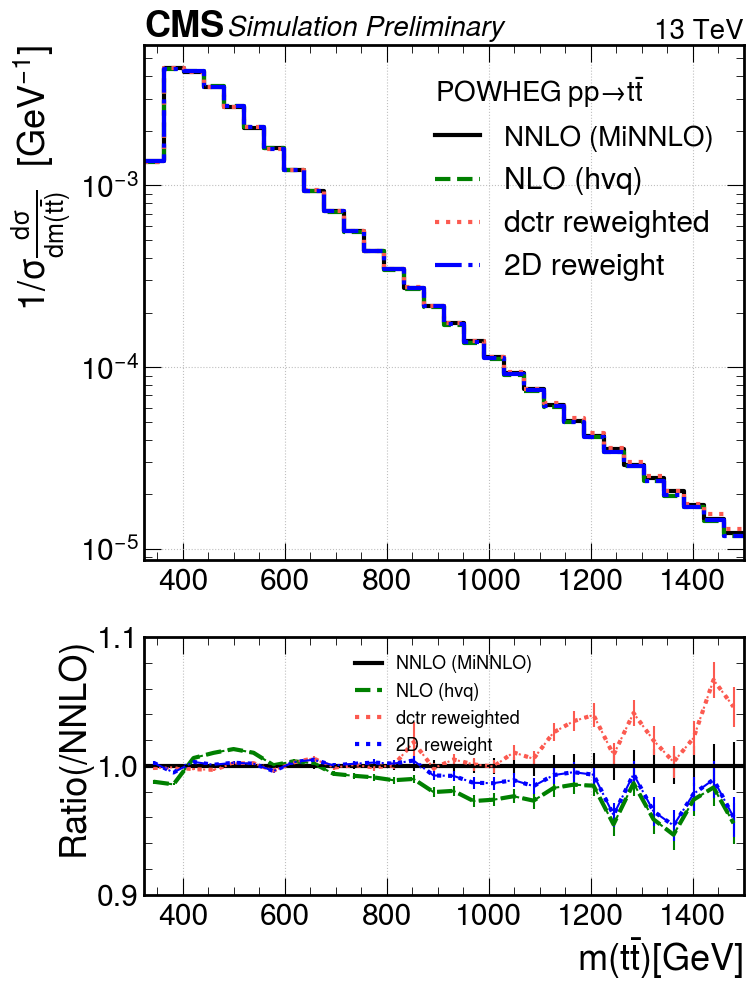

NNLO (MiNNLO): mean: 523.184, std: 178.057, max/min: 5626.682794956003/322.9727283915917 
 Mean Absolute Error 0.0 
 Mean Relative Error 0.0 
 reduced chi square of 0.0 with p 1.0 
 compared to NNLO (MiNNLO)
NLO (hvq): mean: 522.032, std: 176.366, max/min: 4957.45130467695/222.74225458209077 
 Mean Absolute Error 2640.14651133098 
 Mean Relative Error 0.020478878631988686 
 reduced chi square of 17.8633353523735 with p 5.615643118248206e-91 
 compared to NNLO (MiNNLO)
dctr reweighted: mean: 523.942, std: 179.742, max/min: 4957.45130467695/222.74225458209077 
 Mean Absolute Error 770.7719889322917 
 Mean Relative Error 0.01253695972263813 
 reduced chi square of 3.797421908095353 with p 2.2063588742695357e-11 
 compared to NNLO (MiNNLO)
2D reweight: mean: 522.289, std: 177.054, max/min: 4957.45130467695/222.74225458209077 
 Mean Absolute Error 1362.3799574631037 
 Mean Relative Error 0.013210581837944354 
 reduced chi square of 27.65221421408869 with p 4.568052637732479e-150 
 compared 

In [41]:
# setup args for plotting
args_bin = [(X1_plt, X1_plt_wgt, 'NNLO (MiNNLO)'),
            (X0_plt[:9553938], X0_plt_wgt[:9553938], 'NLO (hvq)'),
            (X0_plt[:9553938], rwgt[0][:9553938], 'dctr reweighted'),
            (X0_plt[:9553938], bin_rwgt[:9553938], '2D reweight')]



# p_T(tt)
# DCTR.plot_ratio_cms_4(args_bin, arg_index=0, part_index=0 ,bins=bins, y_scale='log', ratio_ylim=[0.8,1.2])
# print(DCTR.plot_ratio(args_bin, arg_index=0, part_index=0 ,bins=bins, stats_only=True))

# p_T(t)
DCTR.plot_ratio_cms_4(args_bin, arg_index=0, part_index=1, start = 0, stop = 600, div=19, y_scale='log', ratio_ylim=[0.9,1.1])
print(DCTR.plot_ratio(args_bin, arg_index=0, part_index=1, start = 0, stop = 600, div=19, stats_only=True))

# p_T(anti-top)
DCTR.plot_ratio_cms_4(args_bin, arg_index=0, part_index=2, start = 0, stop = 600, div=19, y_scale='log', ratio_ylim=[0.9,1.1])
print(DCTR.plot_ratio(args_bin, arg_index=0, part_index=2, start = 0, stop = 600, div=19, stats_only=True))


# m(tt)
DCTR.plot_ratio_cms_4(args_bin, arg_index=3, part_index=0, stop = 1500, div = 31, y_scale='log', ratio_ylim=[0.9,1.1])
print(DCTR.plot_ratio(args_bin, arg_index=3, part_index=0, stop = 1500, div = 31, stats_only=True))


'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


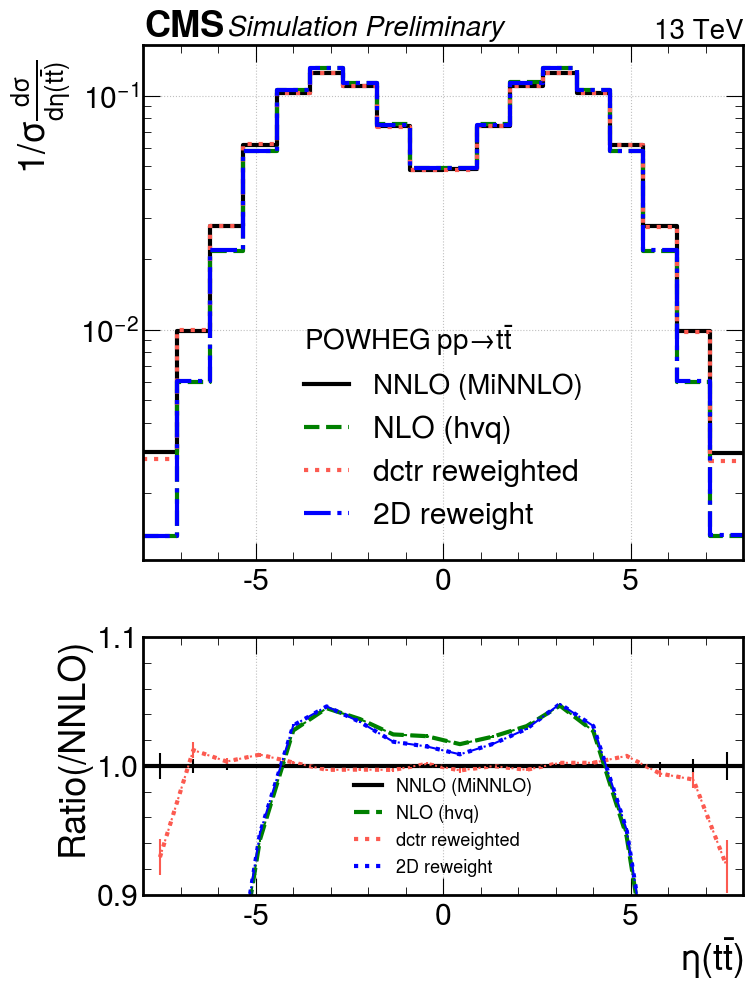

NNLO (MiNNLO): mean: 0.001, std: 3.417, max/min: 13.830049878532156/-13.20077537478709 
 Mean Absolute Error 0.0 
 Mean Relative Error 0.0 
 reduced chi square of 0.0 with p 1.0 
 compared to NNLO (MiNNLO)
NLO (hvq): mean: -0.000, std: 3.291, max/min: 10.023277969879556/-11.59612611504899 
 Mean Absolute Error 23650.51088470771 
 Mean Relative Error 0.30315398197191445 
 reduced chi square of 1509.0647300755868 with p 0.0 
 compared to NNLO (MiNNLO)
dctr reweighted: mean: -0.003, std: 3.413, max/min: 10.023277969879556/-11.59612611504899 
 Mean Absolute Error 1873.9271918402778 
 Mean Relative Error 0.02174948900938034 
 reduced chi square of 7.946529839041156 with p 1.9515744682446688e-20 
 compared to NNLO (MiNNLO)
2D reweight: mean: -0.000, std: 3.296, max/min: 10.023277969879556/-11.59612611504899 
 Mean Absolute Error 22935.1718058662 
 Mean Relative Error 0.29819258670181575 
 reduced chi square of 2153.7620871966924 with p 0.0 
 compared to NNLO (MiNNLO)
([0.0, 23650.51088470771

'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


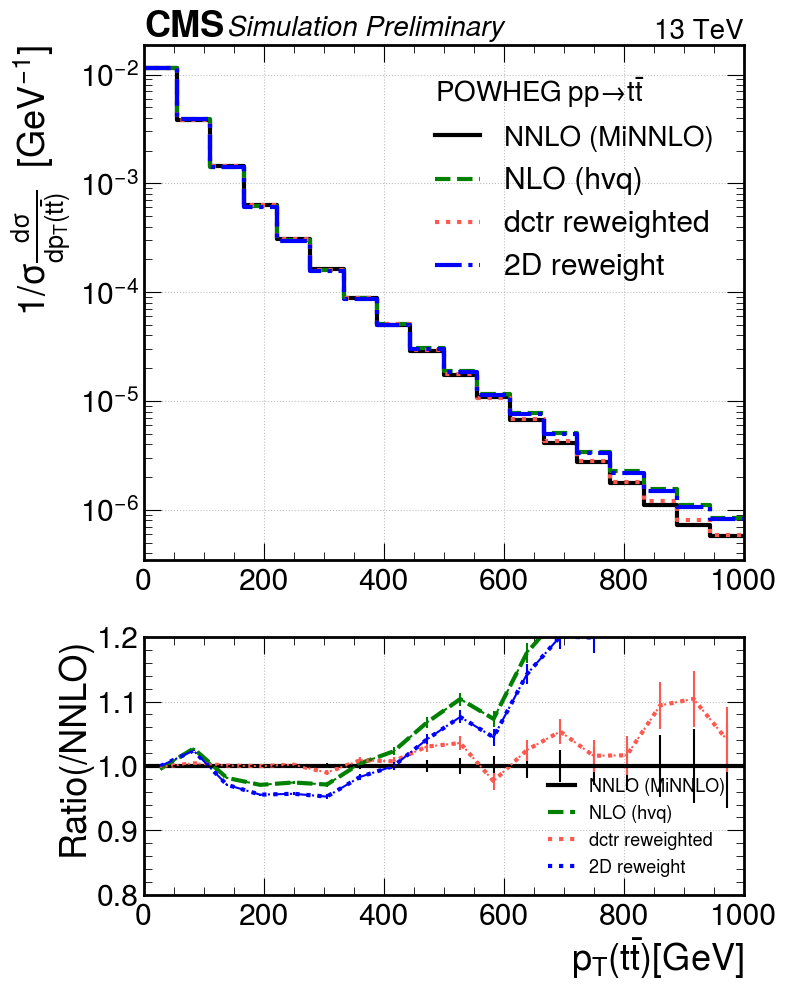

NNLO (MiNNLO): mean: 61.623, std: 72.536, max/min: 1881.821853030107/0.001743452831167295 
 Mean Absolute Error 0.0 
 Mean Relative Error 0.0 
 reduced chi square of 0.0 with p 1.0 
 compared to NNLO (MiNNLO)
NLO (hvq): mean: 62.866, std: 73.082, max/min: 2386.6179856322683/0.012179553537007322 
 Mean Absolute Error 5394.506617380147 
 Mean Relative Error 0.11845320718396854 
 reduced chi square of 67.65807453586905 with p 6.259569449321078e-234 
 compared to NNLO (MiNNLO)
dctr reweighted: mean: 61.764, std: 72.719, max/min: 2386.6179856322683/0.012179553537007322 
 Mean Absolute Error 975.075442843967 
 Mean Relative Error 0.022858113050460815 
 reduced chi square of 2.8423969874313992 with p 7.669295019334035e-05 
 compared to NNLO (MiNNLO)
2D reweight: mean: 62.376, std: 72.505, max/min: 2386.6179856322683/0.012179553537007322 
 Mean Absolute Error 4648.379924160339 
 Mean Relative Error 0.10826843037956888 
 reduced chi square of 167.5075098391319 with p 0.0 
 compared to NNLO (MiN

In [51]:
# eta(tt)
DCTR.plot_ratio_cms_4(args_bin, arg_index=4, part_index=0, start = -8, stop = 8, div=19, y_scale='log', ratio_ylim=[0.9,1.1])
print(DCTR.plot_ratio(args_bin, arg_index=4, part_index=0, start = -8, stop = 8, div=19, stats_only=True))


# p_T(tt)
DCTR.plot_ratio_cms_4(args_bin, arg_index=0, part_index=0, start = 0, stop = 1000, div = 19, y_scale='log', ratio_ylim=[0.8,1.2])
print(DCTR.plot_ratio(args_bin, arg_index=0, part_index=0, start = 0, stop = 1000, div = 19, stats_only=True))




### plotting p_T of both top and anti-top to increase statistics

X0_pt shape: (19107876,)
X0_pt_wgt shape: (19107876,)
X1_pt shape: (19107876,)
X1_pt_wgt shape: (19107876,)
pt_rwgt shape: (19107876,)
pt_bin_rwgt shape: (19107876,)


'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


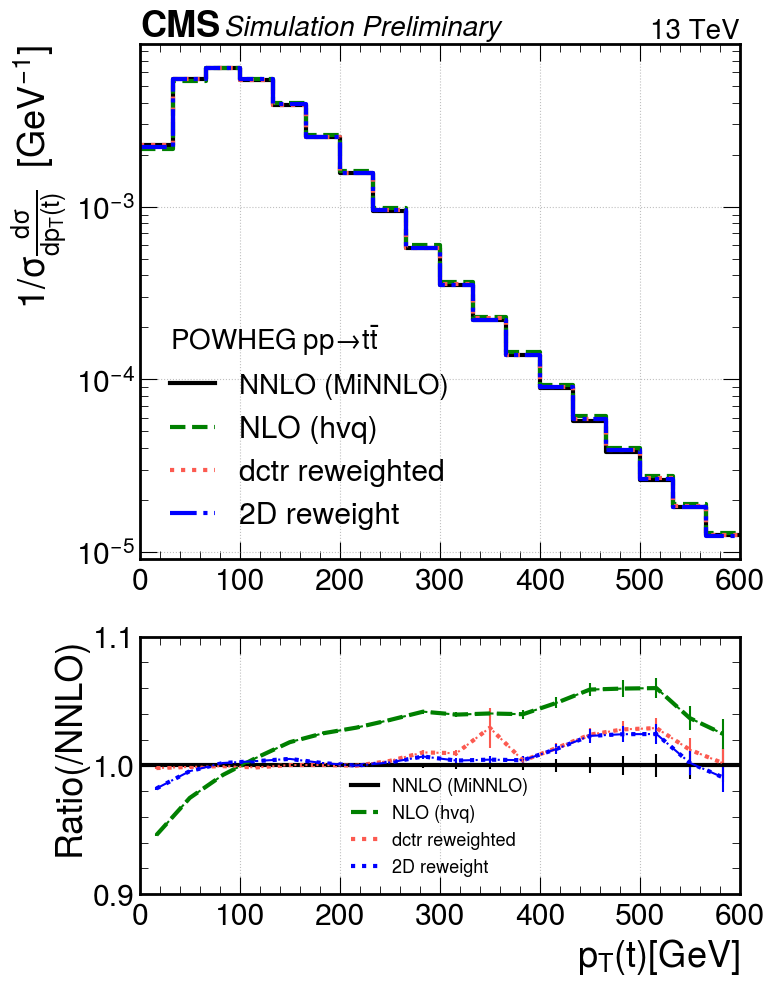

NNLO (MiNNLO): mean: 121.139, std: 80.155, max/min: 2125.1621873385748/0.0166167204004877 
 Mean Absolute Error 0.0 
 Mean Relative Error 0.0 
 reduced chi square of 0.0 with p 1.0 
 compared to NNLO (MiNNLO)
NLO (hvq): mean: 122.945, std: 80.836, max/min: 2125.476380886313/0.013901093618147972 
 Mean Absolute Error 17602.712012813598 
 Mean Relative Error 0.036079130345698505 
 reduced chi square of 229.95683440634562 with p 0.0 
 compared to NNLO (MiNNLO)
dctr reweighted: mean: 121.404, std: 80.643, max/min: 2125.476380886313/0.013901093618147972 
 Mean Absolute Error 1537.739474826389 
 Mean Relative Error 0.012095430865883827 
 reduced chi square of 6.20349267543002 with p 8.572853401440585e-15 
 compared to NNLO (MiNNLO)
2D reweight: mean: 121.455, std: 80.265, max/min: 2125.476380886313/0.013901093618147972 
 Mean Absolute Error 3759.4507027671925 
 Mean Relative Error 0.008444859420428255 
 reduced chi square of 26.938869838116332 with p 1.3205929274813484e-86 
 compared to NNLO

'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


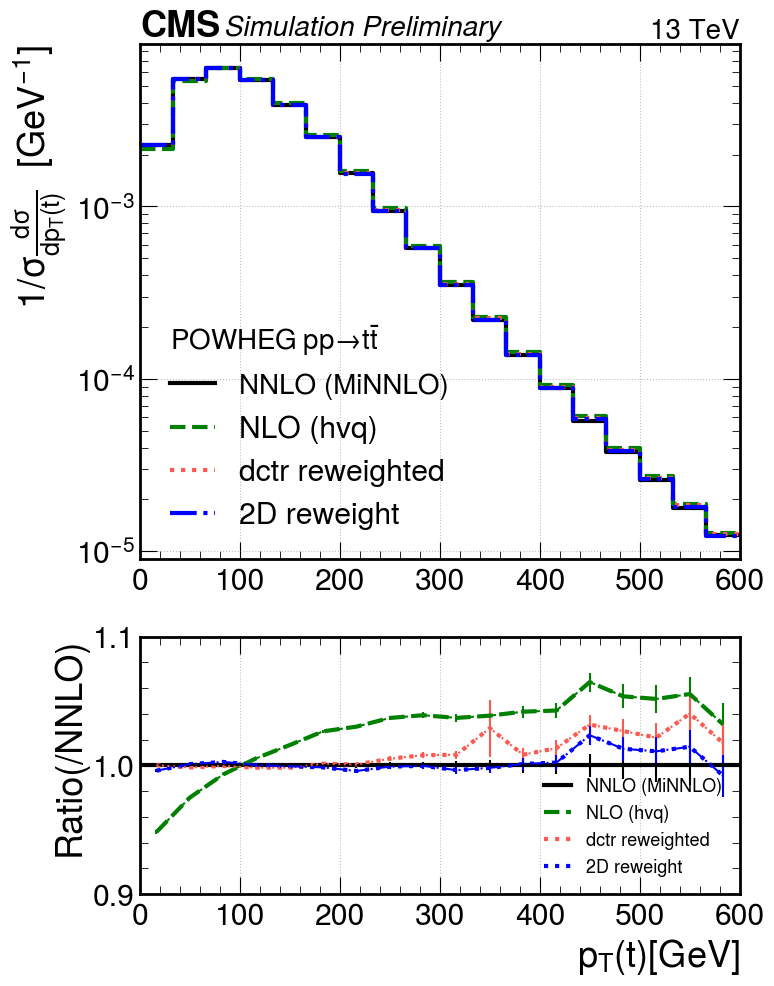

NNLO (MiNNLO): mean: 120.981, std: 80.007, max/min: 2125.1621873385748/0.02517621005772228 
 Mean Absolute Error 0.0 
 Mean Relative Error 0.0 
 reduced chi square of 0.0 with p 1.0 
 compared to NNLO (MiNNLO)
NLO (hvq): mean: 122.756, std: 80.688, max/min: 2118.3017198949424/0.029502534939254157 
 Mean Absolute Error 8583.585845627686 
 Mean Relative Error 0.035907029855353684 
 reduced chi square of 109.96750375467167 with p 0.0 
 compared to NNLO (MiNNLO)
dctr reweighted: mean: 121.255, std: 80.564, max/min: 2118.3017198949424/0.029502534939254157 
 Mean Absolute Error 897.6236165364584 
 Mean Relative Error 0.01417548954486847 
 reduced chi square of 3.8033750302491183 with p 1.755481047860278e-07 
 compared to NNLO (MiNNLO)
2D reweight: mean: 120.968, std: 80.070, max/min: 2118.3017198949424/0.029502534939254157 
 Mean Absolute Error 744.7251564092535 
 Mean Relative Error 0.005065443368577972 
 reduced chi square of 2.1949805866665932 with p 0.003049819275229094 
 compared to NNL

In [66]:
# concating top and anti-top
X0_pt = np.concatenate((X0_plt[:9553938, 1, 0], X0_plt[:9553938, 2, 0]))
print(f'X0_pt shape: {np.shape(X0_pt)}')
X0_pt_wgt = np.concatenate((X0_plt_wgt[:9553938], X0_plt_wgt[:9553938]))
print(f'X0_pt_wgt shape: {np.shape(X0_pt)}')

# print(f'org X0_plt{X0_plt[:,1,0]} \n \n')
# print(f'concat X0_pt{X0_pt}')

X1_pt = np.concatenate((X1_plt[:9553938, 1, 0], X1_plt[:9553938, 2, 0]))
print(f'X1_pt shape: {np.shape(X1_pt)}')
X1_pt_wgt = np.concatenate((X1_plt_wgt, X1_plt_wgt))
print(f'X1_pt_wgt shape: {np.shape(X1_pt)}')

pt_rwgt = np.concatenate((rwgt[0][:9553938], rwgt[0][:9553938]))
print(f'pt_rwgt shape: {np.shape(pt_rwgt)}')

pt_bin_rwgt = np.concatenate((bin_rwgt[:9553938], bin_rwgt[:9553938]))
print(f'pt_bin_rwgt shape: {np.shape(pt_bin_rwgt)}')

# setup args for plotting
args_bin_tt = [(X1_pt, X1_pt_wgt, 'NNLO (MiNNLO)'),
               (X0_pt, X0_pt_wgt, 'NLO (hvq)'),
               (X0_pt, pt_rwgt, 'dctr reweighted'),
               (X0_pt, pt_bin_rwgt, '2D reweight')]

# p_T(t)
DCTR.plot_ratio_cms_4(args_bin_tt, arg_index=0, part_index=1, start = 0, stop = 600, div=19, y_scale='log', ratio_ylim=[0.9,1.1])
print(DCTR.plot_ratio(args_bin_tt, arg_index=0, part_index=1, start = 0, stop = 600, div=19, stats_only=True))


# OLD bin rwgt using p(tt) and eta(tt)

In [42]:
from hep_ml.reweight import BinsReweighter

bin_reweighter = BinsReweighter(n_bins=31, n_neighs=2) 

X0_bin_rwgt_org = []
X1_bin_rwgt_target = []

# decide which (2) dimensions to do the bin rwgt along
X0_bin_rwgt_org.append(X0_plt[:,0,0]) # p_T of tt-pair
X0_bin_rwgt_org.append(X0_plt[:,0,4]) # eta of tt-pair
X0_bin_rwgt_org = np.transpose(X0_bin_rwgt_org)

X1_bin_rwgt_target.append(X1_plt[:,0,0]) # p_T of tt-pair
X1_bin_rwgt_target.append(X1_plt[:,0,4]) # eta of tt-pair
X1_bin_rwgt_target = np.transpose(X1_bin_rwgt_target)

# print(f'X0_bin_rwgt_org: {np.array(X0_bin_rwgt_org)}')
# print(f'X1_bin_rwgt_target: {np.array(X1_bin_rwgt_target)}')

print(f'X0_bin_rwgt_org.shape: {np.shape(X0_bin_rwgt_org)}')
print(f'X0_plt_wgt length: {len(X0_plt_wgt)}')
print(f'X1_bin_rwgt_target.shape: {np.shape(X1_bin_rwgt_target)}')
print(f'X1_plt_wgt length: {len(X1_plt_wgt)}')

bin_reweighter.fit(original=X0_bin_rwgt_org, target=X1_bin_rwgt_target,
               original_weight=X0_plt_wgt, target_weight=X1_plt_wgt)


bin_rwgt_old = bin_reweighter.predict_weights(X0_bin_rwgt_org, original_weight=X0_plt_wgt)



X0_bin_rwgt_org.shape: (63992361, 2)
X0_plt_wgt length: 63992361
X1_bin_rwgt_target.shape: (9553938, 2)
X1_plt_wgt length: 9553938


'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


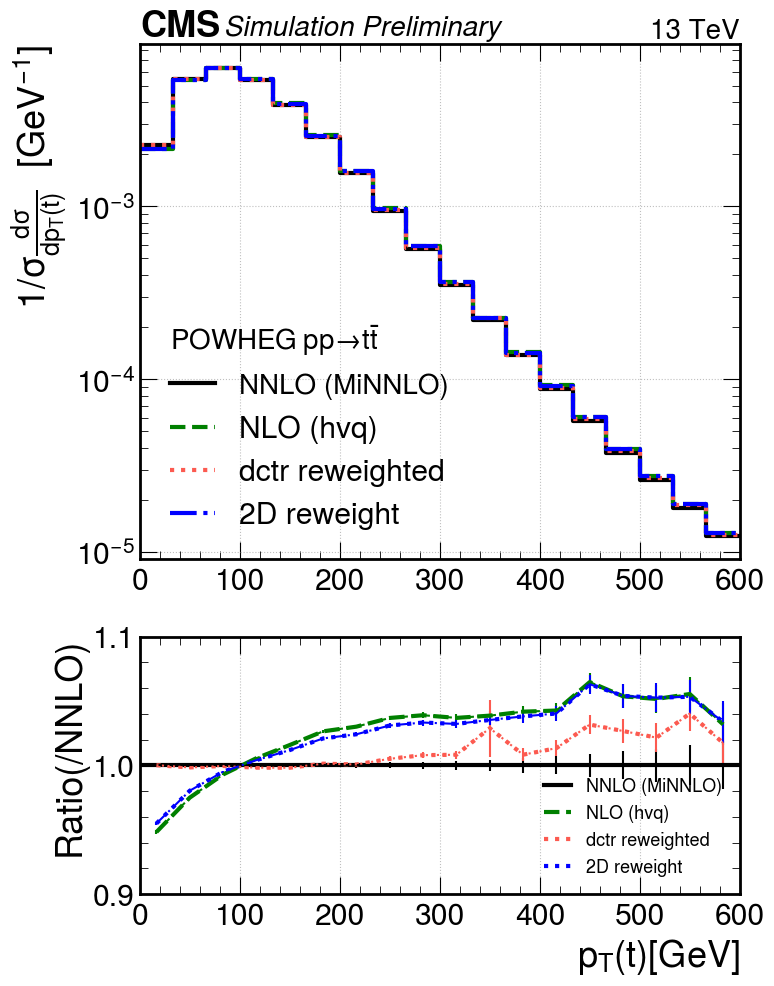

NNLO (MiNNLO): mean: 120.981, std: 80.007, max/min: 2125.1621873385748/0.02517621005772228 
 Mean Absolute Error 0.0 
 Mean Relative Error 0.0 
 reduced chi square of 0.0 with p 1.0 
 compared to NNLO (MiNNLO)
NLO (hvq): mean: 122.756, std: 80.688, max/min: 2118.3017198949424/0.029502534939254157 
 Mean Absolute Error 8583.585845627686 
 Mean Relative Error 0.035907029855353684 
 reduced chi square of 109.96750375467167 with p 0.0 
 compared to NNLO (MiNNLO)
dctr reweighted: mean: 121.255, std: 80.564, max/min: 2118.3017198949424/0.029502534939254157 
 Mean Absolute Error 897.6236165364584 
 Mean Relative Error 0.01417548954486847 
 reduced chi square of 3.8033750302491183 with p 1.755481047860278e-07 
 compared to NNLO (MiNNLO)
2D reweight: mean: 122.481, std: 80.671, max/min: 2118.3017198949424/0.029502534939254157 
 Mean Absolute Error 6921.324279183544 
 Mean Relative Error 0.03287345109115087 
 reduced chi square of 150.55544767836312 with p 0.0 
 compared to NNLO (MiNNLO)
([0.0, 

'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


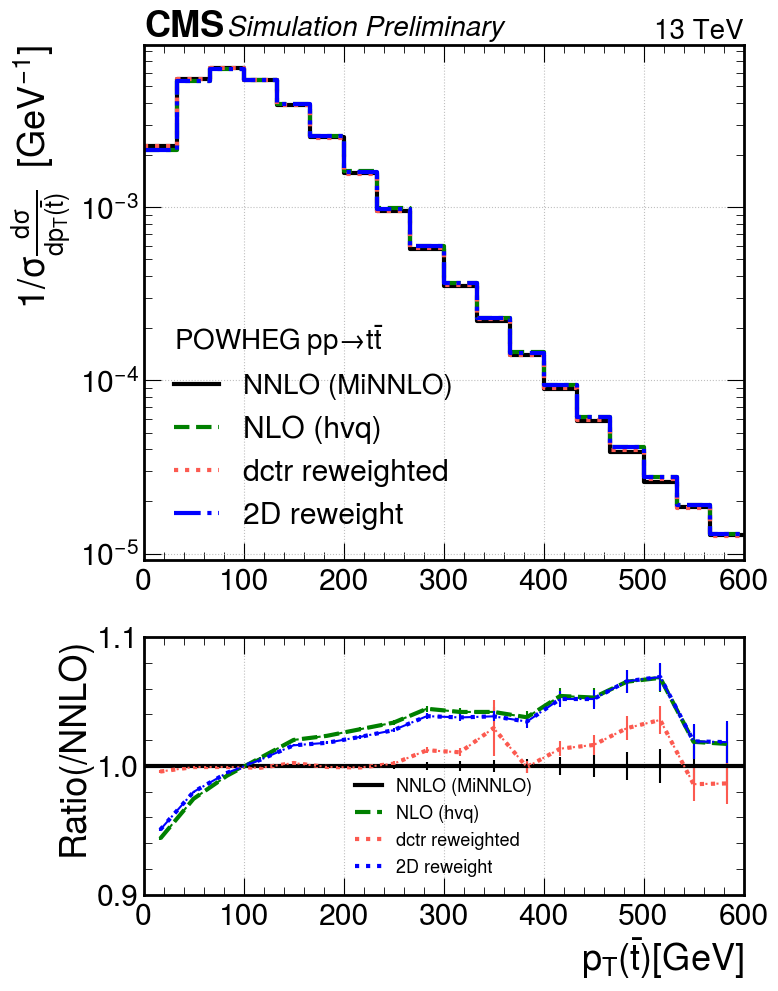

NNLO (MiNNLO): mean: 121.297, std: 80.304, max/min: 2088.7083067517383/0.0166167204004877 
 Mean Absolute Error 0.0 
 Mean Relative Error 0.0 
 reduced chi square of 0.0 with p 1.0 
 compared to NNLO (MiNNLO)
NLO (hvq): mean: 123.134, std: 80.983, max/min: 2125.476380886313/0.013901093618147972 
 Mean Absolute Error 9019.126167185908 
 Mean Relative Error 0.036234049894120504 
 reduced chi square of 120.745263723818 with p 0.0 
 compared to NNLO (MiNNLO)
dctr reweighted: mean: 121.554, std: 80.722, max/min: 2125.476380886313/0.013901093618147972 
 Mean Absolute Error 957.8789876302084 
 Mean Relative Error 0.012124473229050636 
 reduced chi square of 3.3390849457847374 with p 3.556835907683771e-06 
 compared to NNLO (MiNNLO)
2D reweight: mean: 122.859, std: 80.972, max/min: 2125.476380886313/0.013901093618147972 
 Mean Absolute Error 7336.66100964831 
 Mean Relative Error 0.03334077922609975 
 reduced chi square of 167.58118321463206 with p 0.0 
 compared to NNLO (MiNNLO)
([0.0, 9019.1

'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


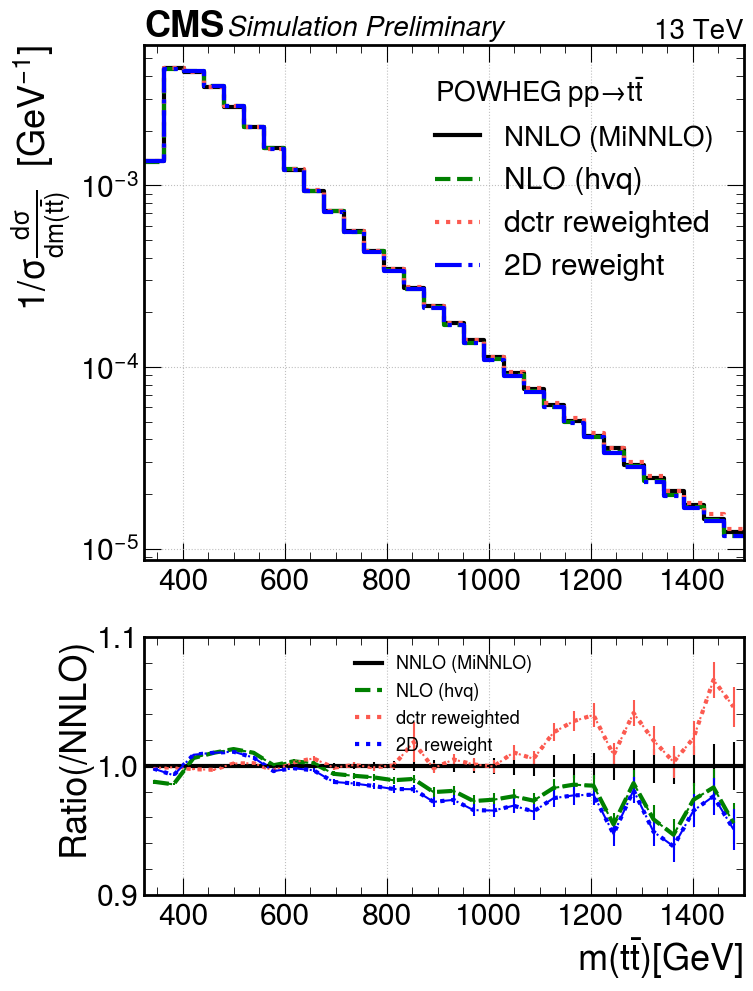

NNLO (MiNNLO): mean: 523.184, std: 178.057, max/min: 5626.682794956003/322.9727283915917 
 Mean Absolute Error 0.0 
 Mean Relative Error 0.0 
 reduced chi square of 0.0 with p 1.0 
 compared to NNLO (MiNNLO)
NLO (hvq): mean: 522.032, std: 176.366, max/min: 4957.45130467695/222.74225458209077 
 Mean Absolute Error 2640.14651133098 
 Mean Relative Error 0.020478878631988686 
 reduced chi square of 17.8633353523735 with p 5.615643118248206e-91 
 compared to NNLO (MiNNLO)
dctr reweighted: mean: 523.942, std: 179.742, max/min: 4957.45130467695/222.74225458209077 
 Mean Absolute Error 770.7719889322917 
 Mean Relative Error 0.01253695972263813 
 reduced chi square of 3.797421908095353 with p 2.2063588742695357e-11 
 compared to NNLO (MiNNLO)
2D reweight: mean: 521.310, std: 175.980, max/min: 4957.45130467695/222.74225458209077 
 Mean Absolute Error 2838.159190102743 
 Mean Relative Error 0.02639269508852058 
 reduced chi square of 44.10938184788452 with p 5.711263318241401e-251 
 compared to

In [43]:
# 9.5M events
args_bin_old = [(X1_plt, X1_plt_wgt, 'NNLO (MiNNLO)'),
                (X0_plt[:9553938], X0_plt_wgt[:9553938], 'NLO (hvq)'),
                (X0_plt[:9553938], rwgt[0][:9553938], 'dctr reweighted'),
                (X0_plt[:9553938], bin_rwgt_old[:9553938], '2D reweight')]



# p_T(tt)
# DCTR.plot_ratio_cms_4(args_bin, arg_index=0, part_index=0 ,bins=bins, y_scale='log', ratio_ylim=[0.8,1.2])
# print(DCTR.plot_ratio(args_bin, arg_index=0, part_index=0 ,bins=bins, stats_only=True))

# p_T(t)
DCTR.plot_ratio_cms_4(args_bin_old, arg_index=0, part_index=1, start = 0, stop = 600, div=19, y_scale='log', ratio_ylim=[0.9,1.1])
print(DCTR.plot_ratio(args_bin_old, arg_index=0, part_index=1, start = 0, stop = 600, div=19, stats_only=True))

# p_T(anti-top)
DCTR.plot_ratio_cms_4(args_bin_old, arg_index=0, part_index=2, start = 0, stop = 600, div=19, y_scale='log', ratio_ylim=[0.9,1.1])
print(DCTR.plot_ratio(args_bin_old, arg_index=0, part_index=2, start = 0, stop = 600, div=19, stats_only=True))


# m(tt)
DCTR.plot_ratio_cms_4(args_bin_old, arg_index=3, part_index=0, stop = 1500, div = 31, y_scale='log', ratio_ylim=[0.9,1.1])
print(DCTR.plot_ratio(args_bin_old, arg_index=3, part_index=0, stop = 1500, div = 31, stats_only=True))


'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


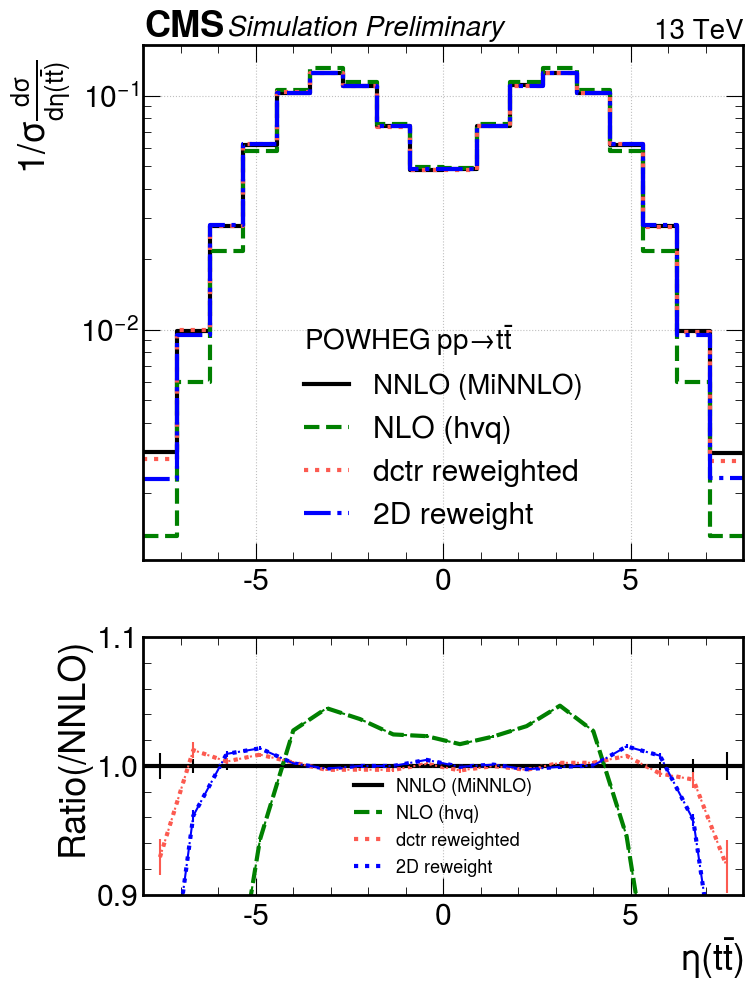

NNLO (MiNNLO): mean: 0.001, std: 3.417, max/min: 13.830049878532156/-13.20077537478709 
 Mean Absolute Error 0.0 
 Mean Relative Error 0.0 
 reduced chi square of 0.0 with p 1.0 
 compared to NNLO (MiNNLO)
NLO (hvq): mean: -0.000, std: 3.291, max/min: 10.023277969879556/-11.59612611504899 
 Mean Absolute Error 23650.51088470771 
 Mean Relative Error 0.30315398197191445 
 reduced chi square of 1509.0647300755868 with p 0.0 
 compared to NNLO (MiNNLO)
dctr reweighted: mean: -0.003, std: 3.413, max/min: 10.023277969879556/-11.59612611504899 
 Mean Absolute Error 1873.9271918402778 
 Mean Relative Error 0.02174948900938034 
 reduced chi square of 7.946529839041156 with p 1.9515744682446688e-20 
 compared to NNLO (MiNNLO)
2D reweight: mean: -0.000, std: 3.399, max/min: 10.023277969879556/-11.59612611504899 
 Mean Absolute Error 2710.9501604906836 
 Mean Relative Error 0.060676279739038254 
 reduced chi square of 161.63665517008232 with p 0.0 
 compared to NNLO (MiNNLO)
([0.0, 23650.51088470

'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


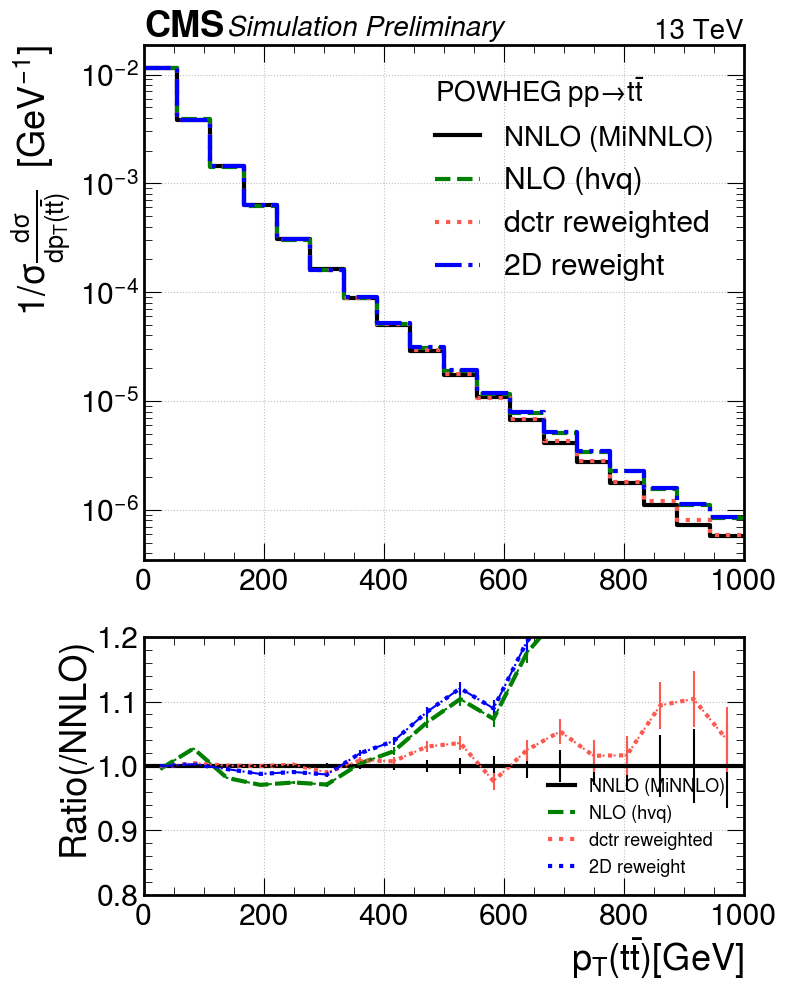

NNLO (MiNNLO): mean: 61.623, std: 72.536, max/min: 1881.821853030107/0.001743452831167295 
 Mean Absolute Error 0.0 
 Mean Relative Error 0.0 
 reduced chi square of 0.0 with p 1.0 
 compared to NNLO (MiNNLO)
NLO (hvq): mean: 62.866, std: 73.082, max/min: 2386.6179856322683/0.012179553537007322 
 Mean Absolute Error 5394.506617380147 
 Mean Relative Error 0.11845320718396854 
 reduced chi square of 67.65807453586905 with p 6.259569449321078e-234 
 compared to NNLO (MiNNLO)
dctr reweighted: mean: 61.764, std: 72.719, max/min: 2386.6179856322683/0.012179553537007322 
 Mean Absolute Error 975.075442843967 
 Mean Relative Error 0.022858113050460815 
 reduced chi square of 2.8423969874313992 with p 7.669295019334035e-05 
 compared to NNLO (MiNNLO)
2D reweight: mean: 62.089, std: 74.120, max/min: 2386.6179856322683/0.012179553537007322 
 Mean Absolute Error 1176.7536670416039 
 Mean Relative Error 0.12154596594108409 
 reduced chi square of 63.325965558365624 with p 3.744517583144908e-218 
 

In [52]:
# eta(tt)
DCTR.plot_ratio_cms_4(args_bin_old, arg_index=4, part_index=0, start = -8, stop = 8, div=19, y_scale='log', ratio_ylim=[0.9,1.1])
print(DCTR.plot_ratio(args_bin_old, arg_index=4, part_index=0, start = -8, stop = 8, div=19, stats_only=True))


# p_T(tt)
DCTR.plot_ratio_cms_4(args_bin_old, arg_index=0, part_index=0, start = 0, stop = 1000, div = 19, y_scale='log', ratio_ylim=[0.8,1.2])
print(DCTR.plot_ratio(args_bin_old, arg_index=0, part_index=0, start = 0, stop = 1000, div = 19, stats_only=True))


# stats

comparing DCTR to 2D bin reweighting

In [14]:
# DCTR.plot_ratio()
# takes args in form [(X0, wgt0, label0),(X1, wgt1, label1), etc.]
# plots histograms of X's and a ratio plot comapring all X's to X0 (first input in args)
# calculates, prints and returns mae, chi2 and p-value (from chi2 and num_bins)
# default parameters: 
    # arg_index = 0, part_index = 0, # which observable from the dataset to plot. Ignored if 1D dataset is passed (like in delta phi above)
    # title = None, x_label = None, y_label = None, # if None are given, generate title, etc. from arg/part index
    # bins = None, start = None, stop = None, div = 35, # if bins is None generate binning with start/stop if None are given use min/max
    # ratio_ylim=[0.9,1.1], figsize=(8,8), layout='rows', stats_only=False # plotting args

args_bin = [(X1_plt, X1_plt_wgt, 'NNLO (MiNNLO)'),
            (X0_plt, X0_plt_wgt, 'NLO (hvq)'),
            (X0_plt, rwgt[0], 'dctr reweighted'),
            (X0_plt, bin_rwgt, '2D reweight')]

arg_indices = [0, 3, 4, 5]
part_indices = [0, 1]

mae_all = []
chi2_all = []
p_all = []

# set plotting parameters
for part_index in part_indices:
    for arg_index in arg_indices:
        bins = []
        ratio_ylim = [0.75, 1.25]
        div = 31
        if arg_index == 1:  # rapidity
            start = None
            stop = None
        elif arg_index == 3:  # mass
            if part_index == 0:  # tt-pair
                start = None
                stop = 1500
                ratio_ylim = [0.90, 1.10]
            else:
                start = None
                stop = None
                div = 32
                ratio_ylim = [0.85, 1.15]
        elif arg_index == 4:  # pseudorapidity
            start = -9
            stop = 9
        elif arg_index == 5: # energy
            ratio_ylim = [0.9, 1.10]
            if part_index == 0:  # tt-pair
                start = None
                stop = 3000
            else:
                start = None
                stop = 2000
        else:  # pt
            ratio_ylim = [0.8, 1.2]
            start = 0
            stop = 1000
        
        # plot and calculate stats
        mae_list, chi2_list, p_list = DCTR.plot_ratio(args_bin, arg_index=arg_index, part_index=part_index, start=start, stop=stop, div=div, ratio_ylim=ratio_ylim, stats_only=True, verbose=False)

        # save stats
        mae_all.append(mae_list)
        chi2_all.append(chi2_list)
        p_all.append(p_list)



# delta phi
X0_delta_phi = DCTR.delta_phi(X0_plt)
X1_delta_phi = DCTR.delta_phi(X1_plt)

args_delta_phi = [(X1_delta_phi, X1_plt_wgt, 'NNLO (MiNNLO)'), 
                  (X0_delta_phi, X0_plt_wgt, 'NLO (hvq)'),
                  (X0_delta_phi, rwgt[0], 'dctr reweighted'),
                  (X0_delta_phi, bin_rwgt, '2D reweight')]


mae_list, chi2_list, p_list = DCTR.plot_ratio(args_delta_phi, start = 0, stop = math.pi, div=31, stats_only=True, verbose=False)

# save stats
mae_all.append(mae_list)
chi2_all.append(chi2_list)
p_all.append(p_list)

# mean stats for each in args
mae_mean = np.mean(mae_all, axis = 0)
chi2_mean = np.mean(chi2_all, axis = 0)
p_mean = np.mean(p_all, axis = 0)


print('[NNLO], [NLO (hvq)], [dctr reweighted], [2D reweight] \n')
print(f'MAE  mean: {mae_mean} \n')
print(f'chi2 mean: {chi2_mean} \n')
print(f'p    mean: {p_mean} \n')



[NNLO], [NLO (hvq)], [dctr reweighted], [2D reweight] 

MAE  mean: [   0.         9238.37820635 1093.77424159 4950.41699344] 

chi2 mean: [   0.         1176.76242537    4.69437408  992.91734458] 

p    mean: [1.00000000e+00 1.43677251e-05 2.93676920e-03 5.12740170e-06] 

